In [ ]:
import numpy as np
import pandas as pd
import os
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score,accuracy_score

In [ ]:
!pip install -qq tqdm

In [ ]:
!pip -qq install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 96.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 37.

In [ ]:
!pip -qq install catboost xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#model paths
kbert="/content/drive/MyDrive/Capstone/Models/Kannada/kbert_kannada.sav"
xlm="/content/drive/MyDrive/Capstone/Models/Kannada/xlm_roberta_kannada.sav"
distilbert="/content/drive/MyDrive/Capstone/Models/Kannada/distilbert_kannada.sav"
muril="/content/drive/MyDrive/Capstone/Models/Kannada/muril_kannada.sav"
mbert="/content/drive/MyDrive/Capstone/Models/Kannada/mbert_kannada.sav"

In [ ]:
import pickle
kbert_model=pickle.load(open(kbert,'rb'))
xlm_model=pickle.load(open(xlm,'rb'))
mbert_model=pickle.load(open(mbert,'rb'))
distilbert_model=pickle.load(open(distilbert,'rb'))
muril_model=pickle.load(open(muril,'rb'))

In [ ]:
colab_sample_data_path = '/content/sample_data'
os.chdir(colab_sample_data_path)

## Preprocessing the dataset (text to numerical feature vector)

In [ ]:
from IPython.display import clear_output
from tqdm import tqdm
import pandas as pd

def preprocess_dataset(df, model, training, batch_size):
    processed_text, labels = [], []

    #n=df[df.columns[0]].count()

    #if training:
    #  df = df.head(int(n * 0.70))
    #else:
    #  df = df.tail(int(n * 0.30))

    # Use tqdm for a progress bar
    total_batches = (len(df) + batch_size - 1) // batch_size
    for i in tqdm(range(0, len(df), batch_size), total=total_batches, desc="Processing Data"):
        batch_texts = df['text'].iloc[i:i+batch_size].tolist()
        batch_labels = df['label'].iloc[i:i+batch_size].tolist()

        # Use batch processing for predictions
        batch_predictions = model.predict(batch_texts)
        processed_text.extend(batch_predictions[1])  # processed text
        labels.extend(batch_labels)

        clear_output(wait=True)

    return np.array(processed_text), np.array(labels)


In [ ]:
dataset2=pd.read_csv("/content/drive/MyDrive/Capstone/Dataset/Preprocessed/kannada_dataset_2_train.csv")
dataset2_filtered = dataset2[dataset2['label'] != 2]
X=list(dataset2_filtered['text'])
y=list(dataset2_filtered['label'])
X_tr, X_te, y_tr, y_te = train_test_split(X, y , random_state=42,test_size=0.3)
train_df = pd.DataFrame({"text": X_tr, "label": y_tr})
test_df = pd.DataFrame({"text": X_te, "label": y_te})

### KBERT Ensemble models for kannada text

In [ ]:
 #get the features vector and their labels (training set)
X_train,y_train=preprocess_dataset(train_df,
                                   model=kbert_model,
                                   training=True,
                                   batch_size=128)

Processing Data: 100%|██████████| 33/33 [00:44<00:00,  1.35s/it]


In [ ]:
#get the features vector and their labels (testing set)
X_test,y_test=preprocess_dataset(test_df,
                                 model=kbert_model,
                                 training=False,
                                 batch_size=128)

Processing Data: 100%|██████████| 14/14 [00:18<00:00,  1.34s/it]


#### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)
pred_svm = svm_classifier.predict(X_test)
print(classification_report(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1314
           1       0.70      0.54      0.61       449

    accuracy                           0.82      1763
   macro avg       0.78      0.73      0.75      1763
weighted avg       0.81      0.82      0.82      1763

[[1208  106]
 [ 205  244]]


#### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
clf=DecisionTreeClassifier(criterion='entropy',random_state=42)
clf.fit(X_train,y_train)
pred_dtc=clf.predict(X_test)
print(classification_report(pred_dtc,y_test))
print(confusion_matrix(pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1374
           1       0.54      0.62      0.58       389

    accuracy                           0.80      1763
   macro avg       0.72      0.74      0.72      1763
weighted avg       0.81      0.80      0.81      1763

[[1168  206]
 [ 146  243]]


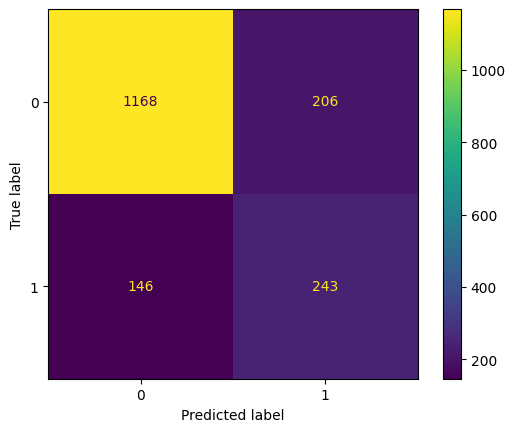

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
fig=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(pred_dtc,y_test),display_labels=clf.classes_)
fig.plot()

#### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1314
           1       0.67      0.56      0.61       449

    accuracy                           0.82      1763
   macro avg       0.76      0.73      0.74      1763
weighted avg       0.81      0.82      0.81      1763

[[1189  125]
 [ 198  251]]


In [ ]:
#find the best tree value
error_rate = []

for i in range(1,40):
    rfc = RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=42)
    rfc.fit(X_train,y_train)
    pred_i = rfc.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

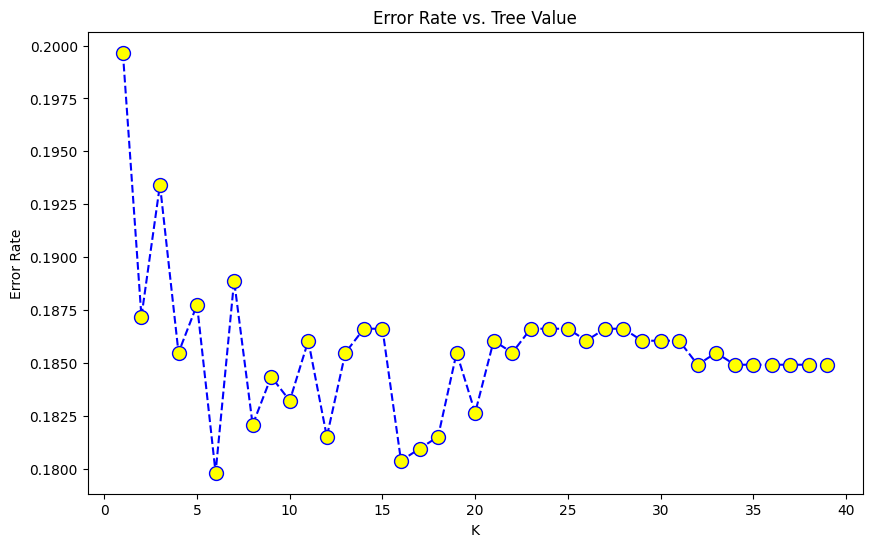

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate vs. Tree Value')
plt.xlabel('K')
plt.ylabel('Error Rate') #error rate decrease as the tree value increases

In [ ]:
rfc = RandomForestClassifier(n_estimators=5,criterion='entropy',random_state=42) #12- trees from elbow method
rfc.fit(X_train,y_train)
pred_rfc= rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1314
           1       0.65      0.57      0.61       449

    accuracy                           0.81      1763
   macro avg       0.75      0.73      0.74      1763
weighted avg       0.81      0.81      0.81      1763

[[1175  139]
 [ 192  257]]


#### Xgboost classifier

In [ ]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(X_train,y_train)
pred_xgb= classifier.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1314
           1       0.65      0.57      0.61       449

    accuracy                           0.81      1763
   macro avg       0.75      0.73      0.74      1763
weighted avg       0.81      0.81      0.81      1763

[[1175  139]
 [ 192  257]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the XGBoost classifier
classifier = XGBClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_classifier = grid_search.best_estimator_

# Make predictions with the best model
pred_xgb = best_classifier.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_xgb))

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1314
           1       0.69      0.55      0.61       449

    accuracy                           0.82      1763
   macro avg       0.77      0.73      0.75      1763
weighted avg       0.81      0.82      0.82      1763

Confusion Matrix:
[[1205  109]
 [ 204  245]]
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


#### Catboost classifier

In [ ]:
from catboost import CatBoostClassifier
classifier=CatBoostClassifier()
classifier.fit(X_train,y_train)
pred_xgb= classifier.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

Learning rate set to 0.01884
0:	learn: 0.6626693	total: 50ms	remaining: 50s
1:	learn: 0.6343406	total: 51.7ms	remaining: 25.8s
2:	learn: 0.6082100	total: 53.5ms	remaining: 17.8s
3:	learn: 0.5826151	total: 55.2ms	remaining: 13.7s
4:	learn: 0.5589145	total: 56.9ms	remaining: 11.3s
5:	learn: 0.5356840	total: 58.6ms	remaining: 9.71s
6:	learn: 0.5144493	total: 60.3ms	remaining: 8.55s
7:	learn: 0.4949741	total: 61.9ms	remaining: 7.68s
8:	learn: 0.4758559	total: 63.8ms	remaining: 7.02s
9:	learn: 0.4582874	total: 65.2ms	remaining: 6.46s
10:	learn: 0.4412639	total: 66.9ms	remaining: 6.01s
11:	learn: 0.4252475	total: 68.6ms	remaining: 5.64s
12:	learn: 0.4101152	total: 70.3ms	remaining: 5.33s
13:	learn: 0.3956042	total: 71.9ms	remaining: 5.07s
14:	learn: 0.3820710	total: 73.7ms	remaining: 4.84s
15:	learn: 0.3695746	total: 75.8ms	remaining: 4.66s
16:	learn: 0.3577460	total: 77.4ms	remaining: 4.48s
17:	learn: 0.3467624	total: 79ms	remaining: 4.31s
18:	learn: 0.3362370	total: 80.6ms	remaining: 4.16s

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

# Define the CatBoost classifier
classifier = CatBoostClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'iterations': [100, 200],
    'depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search cross-validation with early stopping
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data with early stopping
grid_search.fit(X_train, y_train, early_stopping_rounds=10, eval_set=(X_test, y_test), verbose=False)

# Get the best model
best_classifier = grid_search.best_estimator_

# Make predictions with the best model
pred_catboost = best_classifier.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, pred_catboost))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_catboost))

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1314
           1       0.64      0.59      0.61       449

    accuracy                           0.81      1763
   macro avg       0.75      0.74      0.74      1763
weighted avg       0.81      0.81      0.81      1763

Confusion Matrix:
[[1165  149]
 [ 186  263]]
Best Parameters: {'depth': 3, 'iterations': 200, 'learning_rate': 0.05}


### XLM_RoBERTa Ensemble models for kannada text

In [ ]:
 #get the features vector and their labels (training set)
X_train,y_train=preprocess_dataset(train_df,
                                   model=xlm_model,
                                   training=True,
                                   batch_size=128)

Processing Data: 100%|██████████| 33/33 [01:10<00:00,  2.13s/it]


In [ ]:
#get the features vector and their labels (testing set)
X_test,y_test=preprocess_dataset(test_df,
                                 model=xlm_model,
                                 training=False,
                                 batch_size=128)

Processing Data: 100%|██████████| 14/14 [00:29<00:00,  2.09s/it]


#### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)
pred_svm = svm_classifier.predict(X_test)
print(classification_report(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1314
           1       0.67      0.55      0.60       449

    accuracy                           0.82      1763
   macro avg       0.76      0.73      0.74      1763
weighted avg       0.81      0.82      0.81      1763

[[1195  119]
 [ 204  245]]


#### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
clf=DecisionTreeClassifier(criterion='entropy',random_state=42)
clf.fit(X_train,y_train)
pred_dtc=clf.predict(X_test)
print(classification_report(pred_dtc,y_test))
print(confusion_matrix(pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1360
           1       0.57      0.63      0.60       403

    accuracy                           0.81      1763
   macro avg       0.73      0.75      0.74      1763
weighted avg       0.81      0.81      0.81      1763

[[1166  194]
 [ 148  255]]


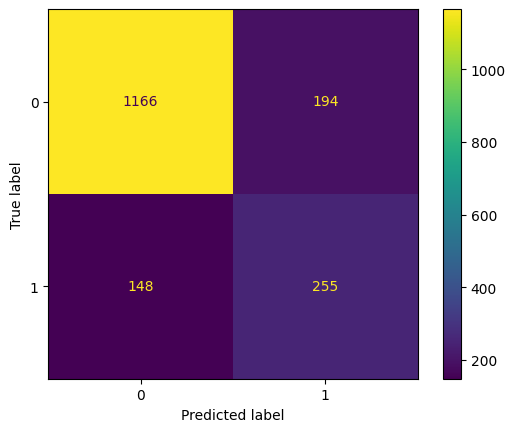

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
fig=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(pred_dtc,y_test),display_labels=clf.classes_)
fig.plot()

#### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1314
           1       0.66      0.56      0.60       449

    accuracy                           0.81      1763
   macro avg       0.76      0.73      0.74      1763
weighted avg       0.81      0.81      0.81      1763

[[1185  129]
 [ 199  250]]


In [ ]:
#find the best tree value
error_rate = []

for i in range(1,40):
    rfc = RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=42)
    rfc.fit(X_train,y_train)
    pred_i = rfc.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

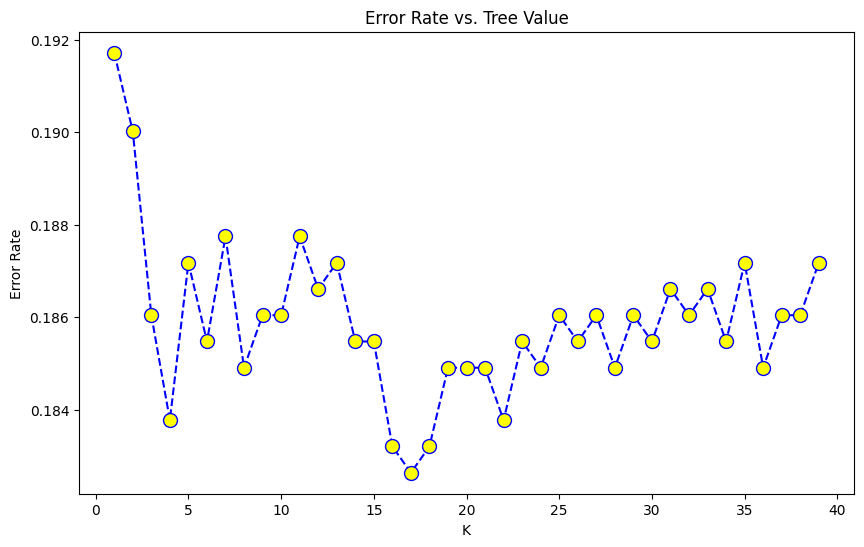

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate vs. Tree Value')
plt.xlabel('K')
plt.ylabel('Error Rate') #error rate decrease as the tree value increases

In [ ]:
rfc = RandomForestClassifier(n_estimators=5,criterion='entropy',random_state=42) #12- trees from elbow method
rfc.fit(X_train,y_train)
pred_rfc= rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1314
           1       0.65      0.56      0.61       449

    accuracy                           0.81      1763
   macro avg       0.76      0.73      0.74      1763
weighted avg       0.81      0.81      0.81      1763

[[1180  134]
 [ 196  253]]


#### Xgboost classifier

In [ ]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(X_train,y_train)
pred_xgb= classifier.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1314
           1       0.65      0.56      0.61       449

    accuracy                           0.81      1763
   macro avg       0.76      0.73      0.74      1763
weighted avg       0.81      0.81      0.81      1763

[[1180  134]
 [ 196  253]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the XGBoost classifier
classifier = XGBClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_classifier = grid_search.best_estimator_

# Make predictions with the best model
pred_xgb = best_classifier.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_xgb))

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1314
           1       0.69      0.53      0.60       449

    accuracy                           0.82      1763
   macro avg       0.77      0.72      0.74      1763
weighted avg       0.81      0.82      0.81      1763

Confusion Matrix:
[[1205  109]
 [ 211  238]]
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


#### Catboost classifier

In [ ]:
from catboost import CatBoostClassifier
classifier=CatBoostClassifier()
classifier.fit(X_train,y_train)
pred_xgb= classifier.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

Learning rate set to 0.01884
0:	learn: 0.6523044	total: 2.29ms	remaining: 2.29s
1:	learn: 0.6134614	total: 4.05ms	remaining: 2.02s
2:	learn: 0.5791319	total: 5.83ms	remaining: 1.94s
3:	learn: 0.5469150	total: 7.67ms	remaining: 1.91s
4:	learn: 0.5168347	total: 9.48ms	remaining: 1.89s
5:	learn: 0.4861403	total: 11.3ms	remaining: 1.87s
6:	learn: 0.4578689	total: 13.1ms	remaining: 1.86s
7:	learn: 0.4346110	total: 14.8ms	remaining: 1.83s
8:	learn: 0.4104584	total: 16.5ms	remaining: 1.82s
9:	learn: 0.3895321	total: 18.2ms	remaining: 1.8s
10:	learn: 0.3690423	total: 19.8ms	remaining: 1.78s
11:	learn: 0.3500703	total: 23.3ms	remaining: 1.92s
12:	learn: 0.3333385	total: 24.9ms	remaining: 1.89s
13:	learn: 0.3171890	total: 26.6ms	remaining: 1.87s
14:	learn: 0.3014783	total: 28.3ms	remaining: 1.85s
15:	learn: 0.2876677	total: 29.9ms	remaining: 1.84s
16:	learn: 0.2738836	total: 31.7ms	remaining: 1.83s
17:	learn: 0.2614205	total: 33.4ms	remaining: 1.82s
18:	learn: 0.2488171	total: 35ms	remaining: 1.

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

# Define the CatBoost classifier
classifier = CatBoostClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'iterations': [100, 200],
    'depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search cross-validation with early stopping
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data with early stopping
grid_search.fit(X_train, y_train, early_stopping_rounds=10, eval_set=(X_test, y_test), verbose=False)

# Get the best model
best_classifier = grid_search.best_estimator_

# Make predictions with the best model
pred_catboost = best_classifier.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, pred_catboost))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_catboost))

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1314
           1       0.64      0.59      0.62       449

    accuracy                           0.81      1763
   macro avg       0.75      0.74      0.75      1763
weighted avg       0.81      0.81      0.81      1763

Confusion Matrix:
[[1163  151]
 [ 182  267]]
Best Parameters: {'depth': 3, 'iterations': 200, 'learning_rate': 0.05}


### DistilBERT Ensemble models for kannada text

In [ ]:
 #get the features vector and their labels (training set)
X_train,y_train=preprocess_dataset(train_df,
                                   model=distilbert_model,
                                   training=True,
                                   batch_size=128)

Processing Data: 100%|██████████| 33/33 [00:43<00:00,  1.31s/it]


In [ ]:
#get the features vector and their labels (testing set)
X_test,y_test=preprocess_dataset(test_df,
                                 model=distilbert_model,
                                 training=False,
                                 batch_size=128)

Processing Data: 100%|██████████| 14/14 [00:18<00:00,  1.29s/it]


#### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)
pred_svm = svm_classifier.predict(X_test)
print(classification_report(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1314
           1       0.64      0.55      0.59       449

    accuracy                           0.81      1763
   macro avg       0.75      0.72      0.73      1763
weighted avg       0.80      0.81      0.80      1763

[[1178  136]
 [ 202  247]]


#### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
clf=DecisionTreeClassifier(criterion='entropy',random_state=42)
clf.fit(X_train,y_train)
pred_dtc=clf.predict(X_test)
print(classification_report(pred_dtc,y_test))
print(confusion_matrix(pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1362
           1       0.56      0.63      0.59       401

    accuracy                           0.80      1763
   macro avg       0.72      0.74      0.73      1763
weighted avg       0.81      0.80      0.81      1763

[[1164  198]
 [ 150  251]]


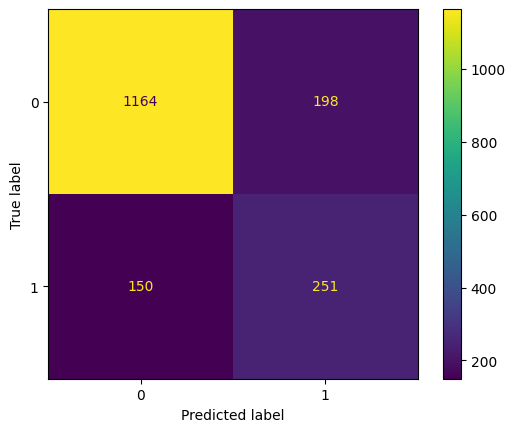

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
fig=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(pred_dtc,y_test),display_labels=clf.classes_)
fig.plot()

#### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1314
           1       0.64      0.53      0.58       449

    accuracy                           0.81      1763
   macro avg       0.75      0.72      0.73      1763
weighted avg       0.80      0.81      0.80      1763

[[1181  133]
 [ 210  239]]


In [ ]:
#find the best tree value
error_rate = []

for i in range(1,40):
    rfc = RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=42)
    rfc.fit(X_train,y_train)
    pred_i = rfc.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

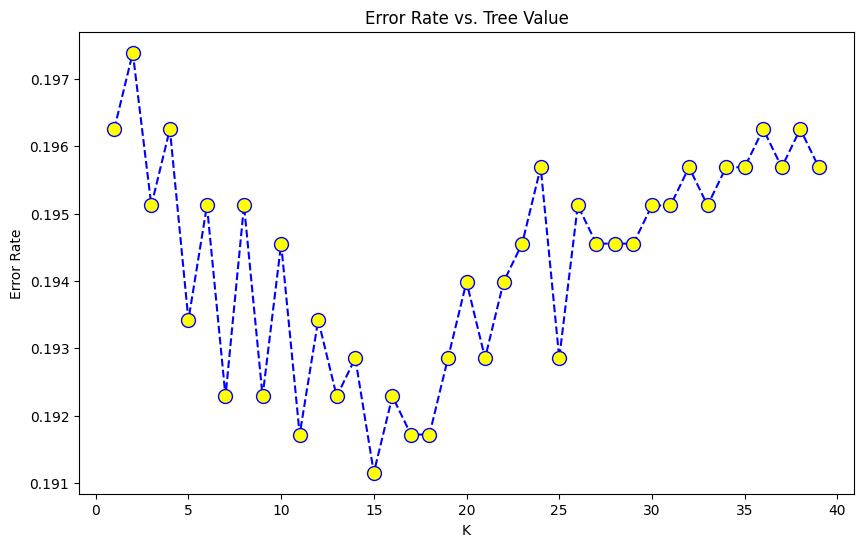

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate vs. Tree Value')
plt.xlabel('K')
plt.ylabel('Error Rate') #error rate decrease as the tree value increases

In [ ]:
rfc = RandomForestClassifier(n_estimators=5,criterion='entropy',random_state=42) #12- trees from elbow method
rfc.fit(X_train,y_train)
pred_rfc= rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1314
           1       0.64      0.55      0.59       449

    accuracy                           0.81      1763
   macro avg       0.75      0.72      0.73      1763
weighted avg       0.80      0.81      0.80      1763

[[1176  138]
 [ 203  246]]


#### Xgboost classifier

In [ ]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(X_train,y_train)
pred_xgb= classifier.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1314
           1       0.64      0.55      0.59       449

    accuracy                           0.81      1763
   macro avg       0.75      0.72      0.73      1763
weighted avg       0.80      0.81      0.80      1763

[[1176  138]
 [ 203  246]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the XGBoost classifier
classifier = XGBClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_classifier = grid_search.best_estimator_

# Make predictions with the best model
pred_xgb = best_classifier.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_xgb))

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1314
           1       0.64      0.56      0.60       449

    accuracy                           0.81      1763
   macro avg       0.75      0.73      0.73      1763
weighted avg       0.80      0.81      0.80      1763

Confusion Matrix:
[[1171  143]
 [ 198  251]]
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


#### Catboost classifier

In [ ]:
from catboost import CatBoostClassifier
classifier=CatBoostClassifier()
classifier.fit(X_train,y_train)
pred_xgb= classifier.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

Learning rate set to 0.01884
0:	learn: 0.6518557	total: 2.79ms	remaining: 2.78s
1:	learn: 0.6107550	total: 4.49ms	remaining: 2.24s
2:	learn: 0.5740641	total: 6.19ms	remaining: 2.06s
3:	learn: 0.5406364	total: 7.88ms	remaining: 1.96s
4:	learn: 0.5118090	total: 9.58ms	remaining: 1.91s
5:	learn: 0.4802677	total: 11.3ms	remaining: 1.87s
6:	learn: 0.4515952	total: 13.2ms	remaining: 1.87s
7:	learn: 0.4281695	total: 14.9ms	remaining: 1.84s
8:	learn: 0.4052390	total: 16.6ms	remaining: 1.82s
9:	learn: 0.3828301	total: 18.3ms	remaining: 1.81s
10:	learn: 0.3618358	total: 19.9ms	remaining: 1.79s
11:	learn: 0.3435629	total: 21.6ms	remaining: 1.78s
12:	learn: 0.3266345	total: 23.3ms	remaining: 1.77s
13:	learn: 0.3090509	total: 25ms	remaining: 1.76s
14:	learn: 0.2928911	total: 26.7ms	remaining: 1.75s
15:	learn: 0.2782891	total: 28.6ms	remaining: 1.75s
16:	learn: 0.2646047	total: 30.1ms	remaining: 1.74s
17:	learn: 0.2520305	total: 31.8ms	remaining: 1.74s
18:	learn: 0.2398419	total: 33.5ms	remaining: 1

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

# Define the CatBoost classifier
classifier = CatBoostClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'iterations': [100, 200],
    'depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search cross-validation with early stopping
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data with early stopping
grid_search.fit(X_train, y_train, early_stopping_rounds=10, eval_set=(X_test, y_test), verbose=False)

# Get the best model
best_classifier = grid_search.best_estimator_

# Make predictions with the best model
pred_catboost = best_classifier.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, pred_catboost))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_catboost))

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1314
           1       0.64      0.58      0.61       449

    accuracy                           0.81      1763
   macro avg       0.75      0.73      0.74      1763
weighted avg       0.80      0.81      0.81      1763

Confusion Matrix:
[[1165  149]
 [ 189  260]]
Best Parameters: {'depth': 5, 'iterations': 100, 'learning_rate': 0.05}


### mBERT Ensemble models for kannada text

In [ ]:
 #get the features vector and their labels (training set)
X_train,y_train=preprocess_dataset(train_df,
                                   model=mbert_model,
                                   training=True,
                                   batch_size=128)

Processing Data: 100%|██████████| 33/33 [00:45<00:00,  1.37s/it]


In [ ]:
#get the features vector and their labels (testing set)
X_test,y_test=preprocess_dataset(test_df,
                                 model=mbert_model,
                                 training=False,
                                 batch_size=128)

Processing Data: 100%|██████████| 14/14 [00:17<00:00,  1.24s/it]


#### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)
pred_svm = svm_classifier.predict(X_test)
print(classification_report(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1314
           1       0.69      0.55      0.61       449

    accuracy                           0.82      1763
   macro avg       0.77      0.73      0.75      1763
weighted avg       0.81      0.82      0.81      1763

[[1201  113]
 [ 202  247]]


#### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
clf=DecisionTreeClassifier(criterion='entropy',random_state=42)
clf.fit(X_train,y_train)
pred_dtc=clf.predict(X_test)
print(classification_report(pred_dtc,y_test))
print(confusion_matrix(pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1391
           1       0.56      0.67      0.61       372

    accuracy                           0.82      1763
   macro avg       0.73      0.77      0.75      1763
weighted avg       0.83      0.82      0.82      1763

[[1193  198]
 [ 121  251]]


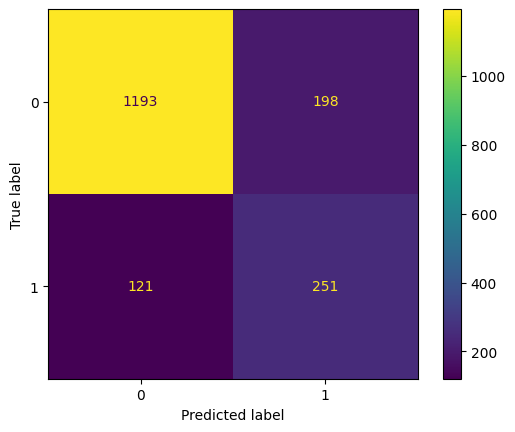

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
fig=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(pred_dtc,y_test),display_labels=clf.classes_)
fig.plot()

#### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1314
           1       0.68      0.58      0.63       449

    accuracy                           0.82      1763
   macro avg       0.77      0.74      0.76      1763
weighted avg       0.82      0.82      0.82      1763

[[1193  121]
 [ 189  260]]


In [ ]:
#find the best tree value
error_rate = []

for i in range(1,40):
    rfc = RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=42)
    rfc.fit(X_train,y_train)
    pred_i = rfc.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

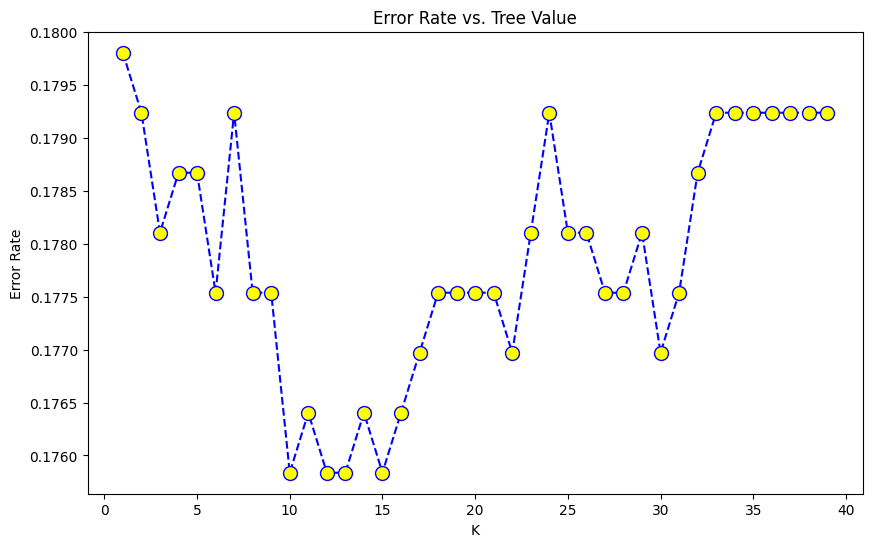

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate vs. Tree Value')
plt.xlabel('K')
plt.ylabel('Error Rate') #error rate decrease as the tree value increases

In [ ]:
rfc = RandomForestClassifier(n_estimators=5,criterion='entropy',random_state=42) #12- trees from elbow method
rfc.fit(X_train,y_train)
pred_rfc= rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1314
           1       0.68      0.57      0.62       449

    accuracy                           0.82      1763
   macro avg       0.77      0.74      0.75      1763
weighted avg       0.81      0.82      0.82      1763

[[1191  123]
 [ 192  257]]


#### Xgboost classifier

In [ ]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(X_train,y_train)
pred_xgb= classifier.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1314
           1       0.68      0.57      0.62       449

    accuracy                           0.82      1763
   macro avg       0.77      0.74      0.75      1763
weighted avg       0.81      0.82      0.82      1763

[[1191  123]
 [ 192  257]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the XGBoost classifier
classifier = XGBClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_classifier = grid_search.best_estimator_

# Make predictions with the best model
pred_xgb = best_classifier.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_xgb))

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1314
           1       0.66      0.62      0.64       449

    accuracy                           0.82      1763
   macro avg       0.77      0.75      0.76      1763
weighted avg       0.82      0.82      0.82      1763

Confusion Matrix:
[[1171  143]
 [ 172  277]]
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


#### Catboost classifier

In [ ]:
from catboost import CatBoostClassifier
classifier=CatBoostClassifier()
classifier.fit(X_train,y_train)
pred_xgb= classifier.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

Learning rate set to 0.01884
0:	learn: 0.6363539	total: 5.89ms	remaining: 5.89s
1:	learn: 0.5849668	total: 12.5ms	remaining: 6.21s
2:	learn: 0.5302662	total: 14.7ms	remaining: 4.89s
3:	learn: 0.4874055	total: 19.3ms	remaining: 4.8s
4:	learn: 0.4513326	total: 23.3ms	remaining: 4.63s
5:	learn: 0.4105901	total: 27.4ms	remaining: 4.54s
6:	learn: 0.3760524	total: 31.3ms	remaining: 4.44s
7:	learn: 0.3479266	total: 35.8ms	remaining: 4.43s
8:	learn: 0.3196722	total: 40.1ms	remaining: 4.42s
9:	learn: 0.2907070	total: 44.9ms	remaining: 4.45s
10:	learn: 0.2649835	total: 48.2ms	remaining: 4.33s
11:	learn: 0.2453152	total: 52.5ms	remaining: 4.32s
12:	learn: 0.2257235	total: 57ms	remaining: 4.33s
13:	learn: 0.2082802	total: 61.7ms	remaining: 4.34s
14:	learn: 0.1925999	total: 68.1ms	remaining: 4.47s
15:	learn: 0.1775244	total: 70.4ms	remaining: 4.33s
16:	learn: 0.1612647	total: 74.6ms	remaining: 4.31s
17:	learn: 0.1498980	total: 78.7ms	remaining: 4.29s
18:	learn: 0.1387484	total: 84.8ms	remaining: 4.

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

# Define the CatBoost classifier
classifier = CatBoostClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'iterations': [100, 200],
    'depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search cross-validation with early stopping
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data with early stopping
grid_search.fit(X_train, y_train, early_stopping_rounds=10, eval_set=(X_test, y_test), verbose=False)

# Get the best model
best_classifier = grid_search.best_estimator_

# Make predictions with the best model
pred_catboost = best_classifier.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, pred_catboost))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_catboost))

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1314
           1       0.67      0.59      0.63       449

    accuracy                           0.82      1763
   macro avg       0.77      0.74      0.75      1763
weighted avg       0.82      0.82      0.82      1763

Confusion Matrix:
[[1184  130]
 [ 185  264]]
Best Parameters: {'depth': 5, 'iterations': 100, 'learning_rate': 0.05}


### Muril Ensemble models for kannada text

In [ ]:
 #get the features vector and their labels (training set)
X_train,y_train=preprocess_dataset(train_df,
                                   model=muril_model,
                                   training=True,
                                   batch_size=128)

Processing Data: 100%|██████████| 33/33 [00:47<00:00,  1.45s/it]


In [ ]:
#get the features vector and their labels (testing set)
X_test,y_test=preprocess_dataset(test_df,
                                 model=muril_model,
                                 training=False,
                                 batch_size=128)

Processing Data: 100%|██████████| 14/14 [00:24<00:00,  1.78s/it]


#### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)
pred_svm = svm_classifier.predict(X_test)
print(classification_report(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1314
           1       0.69      0.58      0.63       449

    accuracy                           0.83      1763
   macro avg       0.78      0.75      0.76      1763
weighted avg       0.82      0.83      0.82      1763

[[1195  119]
 [ 188  261]]


#### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
clf=DecisionTreeClassifier(criterion='entropy',random_state=42)
clf.fit(X_train,y_train)
pred_dtc=clf.predict(X_test)
print(classification_report(pred_dtc,y_test))
print(confusion_matrix(pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1332
           1       0.60      0.63      0.61       431

    accuracy                           0.81      1763
   macro avg       0.74      0.75      0.74      1763
weighted avg       0.81      0.81      0.81      1763

[[1153  179]
 [ 161  270]]


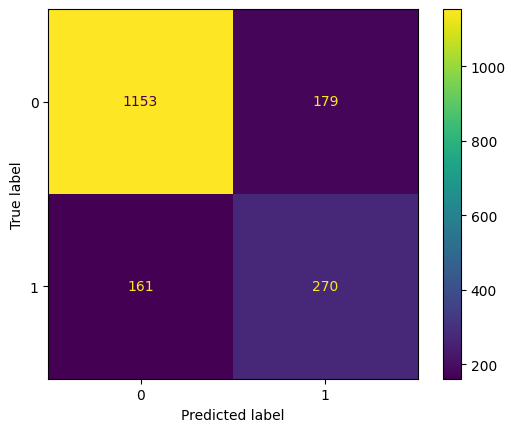

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
fig=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(pred_dtc,y_test),display_labels=clf.classes_)
fig.plot()

#### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1314
           1       0.67      0.59      0.63       449

    accuracy                           0.82      1763
   macro avg       0.77      0.75      0.76      1763
weighted avg       0.82      0.82      0.82      1763

[[1185  129]
 [ 183  266]]


In [ ]:
#find the best tree value
error_rate = []

for i in range(1,40):
    rfc = RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=42)
    rfc.fit(X_train,y_train)
    pred_i = rfc.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

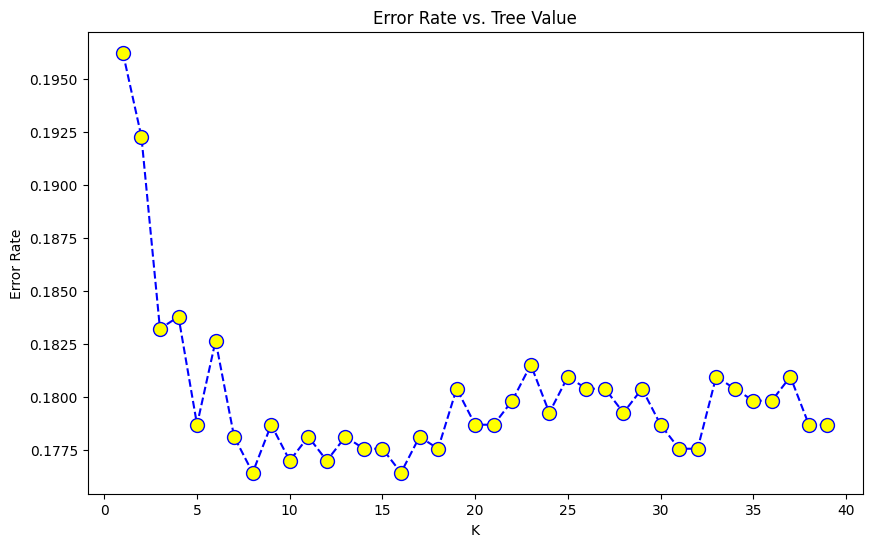

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate vs. Tree Value')
plt.xlabel('K')
plt.ylabel('Error Rate') #error rate decrease as the tree value increases

In [ ]:
rfc = RandomForestClassifier(n_estimators=5,criterion='entropy',random_state=42) #12- trees from elbow method
rfc.fit(X_train,y_train)
pred_rfc= rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1314
           1       0.66      0.61      0.64       449

    accuracy                           0.82      1763
   macro avg       0.77      0.75      0.76      1763
weighted avg       0.82      0.82      0.82      1763

[[1173  141]
 [ 174  275]]


#### Xgboost classifier

In [ ]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(X_train,y_train)
pred_xgb= classifier.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1314
           1       0.66      0.61      0.64       449

    accuracy                           0.82      1763
   macro avg       0.77      0.75      0.76      1763
weighted avg       0.82      0.82      0.82      1763

[[1173  141]
 [ 174  275]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the XGBoost classifier
classifier = XGBClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_classifier = grid_search.best_estimator_

# Make predictions with the best model
pred_xgb = best_classifier.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_xgb))

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1314
           1       0.69      0.58      0.63       449

    accuracy                           0.83      1763
   macro avg       0.78      0.75      0.76      1763
weighted avg       0.82      0.83      0.82      1763

Confusion Matrix:
[[1195  119]
 [ 188  261]]
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


#### Catboost classifier

In [ ]:
from catboost import CatBoostClassifier
classifier=CatBoostClassifier()
classifier.fit(X_train,y_train)
pred_xgb= classifier.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

Learning rate set to 0.01884
0:	learn: 0.6659558	total: 2.02ms	remaining: 2.02s
1:	learn: 0.6399713	total: 3.73ms	remaining: 1.86s
2:	learn: 0.6158516	total: 5.45ms	remaining: 1.81s
3:	learn: 0.5924245	total: 7.26ms	remaining: 1.81s
4:	learn: 0.5709403	total: 8.79ms	remaining: 1.75s
5:	learn: 0.5496874	total: 10.5ms	remaining: 1.74s
6:	learn: 0.5298477	total: 12.3ms	remaining: 1.74s
7:	learn: 0.5113242	total: 14.2ms	remaining: 1.76s
8:	learn: 0.4936110	total: 16.8ms	remaining: 1.85s
9:	learn: 0.4762708	total: 18.6ms	remaining: 1.84s
10:	learn: 0.4601208	total: 20.4ms	remaining: 1.83s
11:	learn: 0.4450998	total: 22.1ms	remaining: 1.82s
12:	learn: 0.4305063	total: 23.7ms	remaining: 1.8s
13:	learn: 0.4166687	total: 25.3ms	remaining: 1.78s
14:	learn: 0.4043159	total: 26.9ms	remaining: 1.76s
15:	learn: 0.3922435	total: 28.4ms	remaining: 1.75s
16:	learn: 0.3809122	total: 30ms	remaining: 1.74s
17:	learn: 0.3702066	total: 31.7ms	remaining: 1.73s
18:	learn: 0.3600529	total: 33.4ms	remaining: 1.

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

# Define the CatBoost classifier
classifier = CatBoostClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'iterations': [100, 200],
    'depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search cross-validation with early stopping
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data with early stopping
grid_search.fit(X_train, y_train, early_stopping_rounds=10, eval_set=(X_test, y_test), verbose=False)

# Get the best model
best_classifier = grid_search.best_estimator_

# Make predictions with the best model
pred_catboost = best_classifier.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, pred_catboost))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_catboost))

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1314
           1       0.69      0.58      0.63       449

    accuracy                           0.83      1763
   macro avg       0.78      0.75      0.76      1763
weighted avg       0.82      0.83      0.82      1763

Confusion Matrix:
[[1197  117]
 [ 189  260]]
Best Parameters: {'depth': 3, 'iterations': 100, 'learning_rate': 0.05}


In [ ]:
import pickle
with open('kannada_catboost_classifier.sav', 'wb') as f:
    pickle.dump(best_classifier, f)

In [ ]:
import shutil

local_model_path = '/content/sample_data/kannada_catboost_classifier.sav'
destination_path = '/content/drive/MyDrive/Capstone/Models/Kannada/kannada_catboost_classifier.sav'

# Copy the file to the destination directory
shutil.copy(local_model_path, destination_path)


'/content/drive/MyDrive/Capstone/Models/Kannada/kannada_catboost_classifier.sav'